# Выбор локации для скважины

Решим, где бурить новую скважину для добывающей компании «ГлавРосГосНефть»

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Построим модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

- В избранном регионе найдем месторождения, для каждого определим значения признаков;
- Построим модель и оценим объём запасов;
- Выберем месторождения с самыми высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Откроем файл с данными, изучим общую информацию и подготовим данные.

Данные геологоразведки трёх регионов находятся в файлах: 

- /datasets/geo_data_0.csv
- /datasets/geo_data_1.csv
- /datasets/geo_data_2.csv



Таким образом, исследование пройдёт в четыре этапа:

- Загрузка и подготовка данных.
- Обучение и подготовка модели.
- Подготовка к расчету прибыли.
- Расчет прибыли и рисков.

Исследование:

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [2]:
# чтение файлов с данными и сохранение 
region_0 = pd.read_csv('/datasets/geo_data_0.csv')
region_1 = pd.read_csv('/datasets/geo_data_1.csv')
region_2 = pd.read_csv('/datasets/geo_data_2.csv')

**Описание данных**:

**Признаки:**

- id — уникальный идентификатор скважины
- f0, f1, f2 — три признака точек

**Целевой признак:**

- product — объём запасов в скважине (тыс. баррелей).

In [3]:
region_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#посмотрим дубликаты
region_0.duplicated(subset=['id'], keep=False).sum() 

20

In [6]:
# удалим 20 дубликатов
region_0  = region_0.drop_duplicates(subset=['id'], keep=False).reset_index(drop = True) 

In [7]:
region_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
#посмотрим дубликаты
region_1.duplicated(subset=['id'], keep=False).sum() 

8

In [10]:
# удалим 8 дубликатов
region_1  = region_1.drop_duplicates(subset=['id'], keep=False).reset_index(drop = True) 

In [11]:
region_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
#посмотрим дубликаты
region_2.duplicated(subset=['id'], keep=False).sum() 

8

In [14]:
# удалим 8 дубликатов
region_2  = region_2.drop_duplicates(subset=['id'], keep=False).reset_index(drop = True) 

**Вывод:**

- В каждом файле было по 5 столбцов и 10000 строк
- Были удалены дубликаты

In [15]:
# удалим строки, которые не понадобятся в исследовании:  id.
region_0 = region_0.drop(['id'], axis=1)
region_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [16]:
# удалим строки, которые не понадобятся в исследовании:  id.
region_1 = region_1.drop(['id'], axis=1)
region_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [17]:
# удалим строки, которые не понадобятся в исследовании:  id.
region_2 = region_2.drop(['id'], axis=1)
region_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


## Обучение и проверка модели

Обучим и проверим модель для каждого региона

### Регион region_0

####  Разделим данные на обучающую и валидационную выборки  в соотношении 75:25

In [18]:
df_train_0, df_valid_0 = train_test_split(region_0, test_size=0.25, random_state=12345) 

In [19]:
# создадим переменные для признаков и целевого признака и запишем в них код
features_train_0 = df_train_0.drop(['product'], axis=1)
target_train_0 = df_train_0['product']
features_valid_0 = df_valid_0.drop(['product'], axis=1)
target_valid_0 = df_valid_0['product']

In [20]:
print('Признаки обучающей выборки:',features_train_0.shape,  
      'Целевой признак обучающей выборки:', target_train_0.shape, 
      'Признаки валидационной выборки', features_valid_0.shape,
      'Целевой признак валидационной выборки:',target_valid_0.shape)

Признаки обучающей выборки: (74985, 3) Целевой признак обучающей выборки: (74985,) Признаки валидационной выборки (24995, 3) Целевой признак валидационной выборки: (24995,)


**Вывод:**

- Обучающая модель   - 75 % обучения модели
- Валидационная модель  - 25 % для выбора лучшего алгоритма и оптимальных параметров

#### Обучим модель и сделаем предсказания на валидационной выборке

In [21]:
model_0 = LinearRegression( )# инициализируем модель LinearRegression
model_0.fit(features_train_0, target_train_0) # обучим модель на тренировочной выборке
predictions_valid_0 = model_0.predict(features_valid_0) # получим предсказания модели на валидационной выборке

#### Средний запас предсказанного сырья и RMSE модели

In [22]:
region_0_result = mean_squared_error(target_valid_0, predictions_valid_0)**0.5
region_0_mean = predictions_valid_0.mean()
print(f'Средний запас предсказанного сырья: {region_0_mean:.2f}, RMSE модели линейной регрессии на валидационной выборке: {region_0_result:.2f}')

Средний запас предсказанного сырья: 92.42, RMSE модели линейной регрессии на валидационной выборке: 37.72


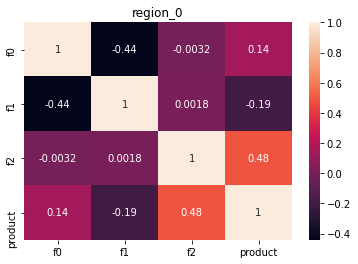

In [23]:
ax = plt.axes()
sns.heatmap(region_0.corr(), annot = True)
ax.set_title('region_0')
plt.show()

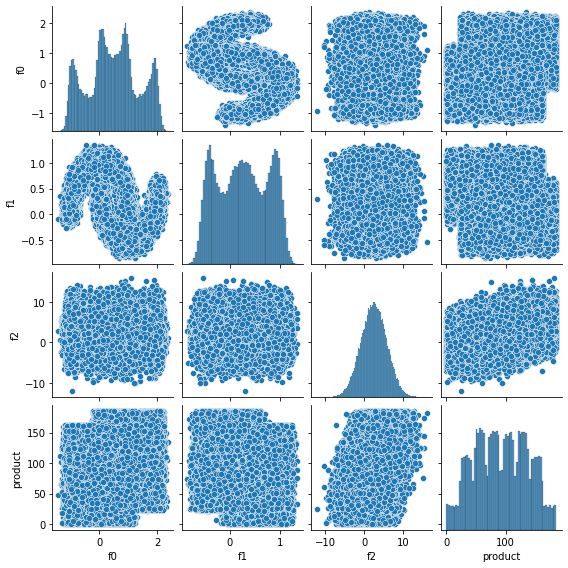

In [24]:
_ = sns.pairplot(region_0, vars=['f0', 'f1', 'f2', 'product'],height=2) 

### Регион region_1

####  Разделим данные на обучающую и валидационную выборки  в соотношении 75:25

In [25]:
# разделим данные на обучающую и валидационную выборки  в соотношении 75:25
df_train_1, df_valid_1= train_test_split(region_1, test_size=0.25, random_state=12345) 

In [26]:
# создадим переменные для признаков и целевого признака и запишем в них код
features_train_1 = df_train_1.drop(['product'], axis=1)
target_train_1 = df_train_1['product']
features_valid_1 = df_valid_1.drop(['product'], axis=1)
target_valid_1 = df_valid_1['product']

In [27]:
print('Признаки обучающей выборки:',features_train_1.shape,  
      'Целевой признак обучающей выборки:', target_train_1.shape, 
      'Признаки валидационной выборки', features_valid_1.shape,
      'Целевой признак валидационной выборки:',target_valid_1.shape)

Признаки обучающей выборки: (74994, 3) Целевой признак обучающей выборки: (74994,) Признаки валидационной выборки (24998, 3) Целевой признак валидационной выборки: (24998,)


**Вывод:**

- Обучающая модель   - 75 % обучения модели
- Валидационная модель  - 25 % для выбора лучшего алгоритма и оптимальных параметров

#### Обучим модель и сделаем предсказания на валидационной выборке

In [28]:
model_1 = LinearRegression( )# инициализируем модель LinearRegression
model_1.fit(features_train_1, target_train_1) # обучим модель на тренировочной выборке
predictions_valid_1 = model_1.predict(features_valid_1) # получим предсказания модели на валидационной выборке

#### Средний запас предсказанного сырья и RMSE модели

In [29]:
region_1_result = mean_squared_error(target_valid_1, predictions_valid_1)**0.5
region_1_mean = predictions_valid_1.mean()
print(f'Средний запас предсказанного сырья: {region_1_mean:.2f}, RMSE модели линейной регрессии на валидационной выборке: {region_1_result:.2f}')

Средний запас предсказанного сырья: 68.98, RMSE модели линейной регрессии на валидационной выборке: 0.89


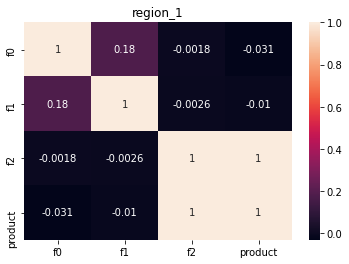

In [30]:
ax = plt.axes()
sns.heatmap(region_1.corr(), annot = True)
ax.set_title('region_1')
plt.show()

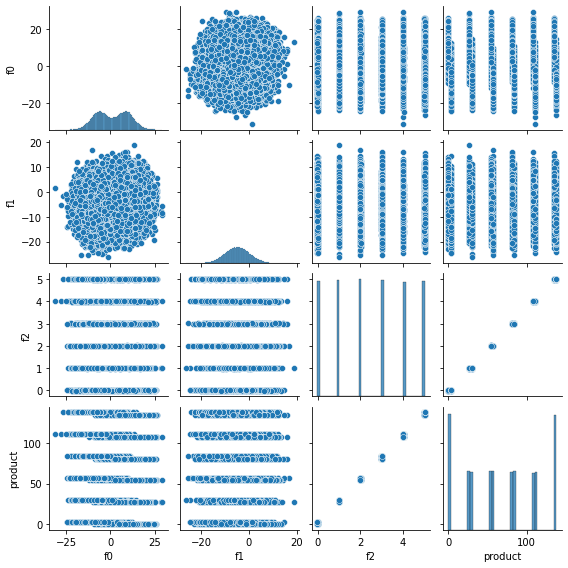

In [31]:
_ = sns.pairplot(region_1, vars=['f0', 'f1', 'f2', 'product'],height=2) 

### Регион region_2

####  Разделим данные на обучающую и валидационную выборки  в соотношении 75:25

In [32]:
# разделим данные на обучающую и валидационную выборки  в соотношении 75:25
df_train_2, df_valid_2= train_test_split(region_2, test_size=0.25, random_state=12345) 

In [33]:
# создадим переменные для признаков и целевого признака и запишем в них код
features_train_2 = df_train_2.drop(['product'], axis=1)
target_train_2 = df_train_2['product']
features_valid_2 = df_valid_2.drop(['product'], axis=1)
target_valid_2 = df_valid_2['product']

In [34]:
print('Признаки обучающей выборки:',features_train_2.shape,  
      'Целевой признак обучающей выборки:', target_train_2.shape, 
      'Признаки валидационной выборки', features_valid_2.shape,
      'Целевой признак валидационной выборки:',target_valid_2.shape)

Признаки обучающей выборки: (74994, 3) Целевой признак обучающей выборки: (74994,) Признаки валидационной выборки (24998, 3) Целевой признак валидационной выборки: (24998,)


**Вывод:**

- Обучающая модель   - 75 % обучения модели
- Валидационная модель  - 25 % для выбора лучшего алгоритма и оптимальных параметров

#### Обучим модель и сделаем предсказания на валидационной выборке

In [35]:
model_2 = LinearRegression( )# инициализируем модель LinearRegression
model_2.fit(features_train_2, target_train_2) # обучим модель на тренировочной выборке
predictions_valid_2 = model_2.predict(features_valid_2) # получим предсказания модели на валидационной выборке

#### Средний запас предсказанного сырья и RMSE модели

In [36]:
region_2_result = mean_squared_error(target_valid_2, predictions_valid_2)**0.5
region_2_mean = predictions_valid_2.mean()
print(f'Средний запас предсказанного сырья: {region_2_mean:.2f}, RMSE модели линейной регрессии на валидационной выборке: {region_2_result:.2f}')

Средний запас предсказанного сырья: 95.12, RMSE модели линейной регрессии на валидационной выборке: 39.98


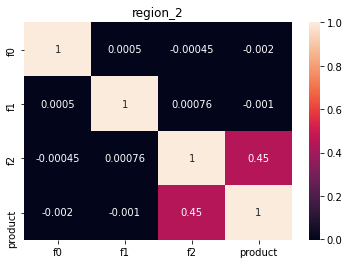

In [37]:
ax = plt.axes()
sns.heatmap(region_2.corr(), annot = True)
ax.set_title('region_2')
plt.show()

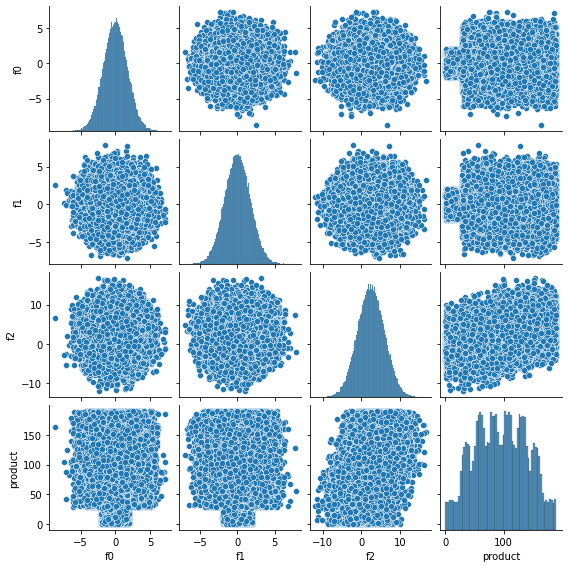

In [38]:
_ = sns.pairplot(region_2, vars=['f0', 'f1', 'f2', 'product'],height=2) 

**Вывод:**

- Разделили данные на обучающую и валидационную выборки в соотношении 75:25
- Обучили модели и сделали предсказания на валидационной выборке с помощью  линейной регрессии (остальные — недостаточно предсказуемые)
- Посчитали среднее количество предсказанных запасов в каждом регионе, и посчитали среднеквадратическую ошибку
 - Регион region_0:средний запас предсказанного сырья: 92.42 тыс. баррелей,RMSE модели линейной регрессии на валидационной выборке: 37.72
 - Регион region_1:средний запас предсказанного сырья: 68.98 тыс. баррелей,RMSE модели линейной регрессии на валидационной выборке: 0.89
 - Регион region_2:средний запас предсказанного сырья: 95.12 тыс. баррелей,RMSE модели линейной регрессии на валидационной выборке: 39.98
- Удалось обнаружить высокую корреляцию между признако f2 и целевым признаком region_1

## Подготовка к расчёту прибыли

Сохраните в отдельных переменных все ключевые значения для расчётов:
- При разведке региона исследуем 500 точек, из которых с помощью машинного обучения выбираем 200 лучших для разработки
- Бюджет на разработку скважин в регионе — 10 млрд рублей
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей

In [39]:
BUDGET = 10000000000 # бюджет на разработку скважин в регионе
BARREL_FINANCE = 450000 # доход с каждой единицы продукта 
BEST = 200 # количество лучших точек для расчета прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины: 

In [40]:
volume_materials = BUDGET/BARREL_FINANCE/BEST
print(f'Объём сырья для безубыточной разработки новой скважины {volume_materials:.2f} баррелей')

Объём сырья для безубыточной разработки новой скважины 111.11 баррелей


Сравним полученный объём сырья со средним запасом в каждом регионе:

In [41]:
if region_0_mean < volume_materials:
    print(f'Средний предсказанный запас сырья в регионе region_0 {region_0_mean:.2f} меньше объёма достаточного для безубыточной разработки на {(volume_materials - region_0_mean):.2f}')
else:
    print(f'Средний предсказанный запас сырья в регионе region_0 {region_0_mean:.2f} больше объёма достаточного для безубыточной разработки на {(volume_materials - region_0_mean):.2f}')

Средний предсказанный запас сырья в регионе region_0 92.42 меньше объёма достаточного для безубыточной разработки на 18.69


In [42]:
if region_1_mean < volume_materials:
    print(f'Средний предсказанный запас сырья в регионе region_1 {region_1_mean:.2f} меньше объёма достаточного для безубыточной разработки на {(volume_materials - region_1_mean):.2f}')
else:
    print(f'Средний предсказанный запас сырья в регионе region_1 {region_1_mean:.2f} больше объёма достаточного для безубыточной разработки на {(volume_materials - region_1_mean):.2f}')

Средний предсказанный запас сырья в регионе region_1 68.98 меньше объёма достаточного для безубыточной разработки на 42.13


In [43]:
if region_2_mean < volume_materials:
    print(f'Средний предсказанный запас сырья в регионе region_2 {region_2_mean:.2f} меньше объёма достаточного для безубыточной разработки на {(volume_materials - region_2_mean):.2f}')
else:
    print(f'Средний предсказанный запас сырья в регионе region_2 {region_2_mean:.2f} больше объёма достаточного для безубыточной разработки на {(volume_materials - region_2_mean):.2f}')

Средний предсказанный запас сырья в регионе region_2 95.12 меньше объёма достаточного для безубыточной разработки на 15.99


**Вывод:**

- Сохранили в отдельных переменных все ключевые значения для расчётов
- Рассчитали достаточный объём сырья для безубыточной разработки новой скважины = 111.11 баррелей
- Сравнили полученный объём сырья со средним запасом в каждом регионе:
 - region_0 меньше объёма на 18.69
 - region_1 меньше объёма на 42.13
 - region_2 меньше объёма на 15.99
 - Лучше всех показал себя region_2, а хуже всех region_1


Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
- Выберем скважины с максимальными значениями предсказаний
- Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям
- Рассчитаем прибыль для полученного объёма сырья

In [44]:
def profit(target, prediction):
    target = pd.Series(target).reset_index(drop=True)
    prediction = pd.Series(prediction).reset_index(drop=True).sort_values(ascending=False).head(BEST).index
    profit = target[prediction].sum() * BARREL_FINANCE - BUDGET
    return round(profit,2)

In [45]:
profit(target_valid_0, predictions_valid_0)

3136026056.66

In [46]:
profit(target_valid_1, predictions_valid_1)

2415086696.68

In [47]:
profit(target_valid_2, predictions_valid_2)

2465945792.01

## Расчёт прибыли и рисков 

Посчитаем риски и прибыль для каждого региона:
- Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли
- Найдем среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
- Напишем выводы: предложим регион для разработки скважин и обоснуем выбор

In [48]:
def bootstrap_profit(target, probabilities):
    state = np.random.RandomState(12345)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, random_state=state, replace=True)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))

    values = pd.Series(values)
    mean = values.mean()
    risk = (values < 0).mean()*100
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    quantile_interval = (lower, upper)
    return round (mean),  round(risk), quantile_interval

In [49]:
region_0_profit, region_0_risk, region_0_quantile = bootstrap_profit(target_valid_0.reset_index(drop=True), predictions_valid_0)
print(f'Средняя прибыль в регионе region_0 {region_0_profit}')
print(f'Риск убытков в регионе region_0 {region_0_risk} %')
print(f'95%-й доверительный интервал регионе region_0 {region_0_quantile}')

Средняя прибыль в регионе region_0 431538187
Риск убытков в регионе region_0 6 %
95%-й доверительный интервал регионе region_0 (-80924626.51799999, 941037638.4047499)


In [50]:
region_1_profit, region_1_risk, region_1_quantile = bootstrap_profit(target_valid_1.reset_index(drop=True), predictions_valid_1)
print(f'Средняя прибыль в регионе region_1 {region_1_profit}')
print(f'Риск убытков в регионе region_1 {region_1_risk} %')
print(f'95%-й доверительный интервал регионе region_1 {region_1_quantile}')

Средняя прибыль в регионе region_1 477948839
Риск убытков в регионе region_1 2 %
95%-й доверительный интервал регионе region_1 (51741836.33, 897944131.39425)


In [51]:
region_2_profit, region_2_risk, region_2_quantile = bootstrap_profit(target_valid_2.reset_index(drop=True), predictions_valid_2)
print(f'Средняя прибыль в регионе region_2 {region_2_profit}')
print(f'Риск убытков в регионе region_2 {region_2_risk} %')
print(f'95%-й доверительный интервал регионе region_2 {region_2_quantile}')

Средняя прибыль в регионе region_2 322147249
Риск убытков в регионе region_2 12 %
95%-й доверительный интервал регионе region_2 (-173464433.9465, 843529290.0705)


**Вывод:**

 По итогам данного исследования после построения модели машиного обучения и анализа возможной прибыли и рисков необходимо  **бурить новую скважину для добывающей компании «ГлавРосГосНефть» в region_1**, т.к.у нее самые лучшеи показатели , а именно:
 - Средняя прибыль в регионе region_1 **477948839**
 - Риск убытков в регионе region_1 **2 %**
 - 95%-й доверительный интервал регионе region_1 **51741836.33, 897944131.39**